<a href="https://colab.research.google.com/github/Abdullah-NI/ML-project/blob/main/09%20DL%20project-2%20MNIST%20digit%20classification/44_DL_project_2_MNIST_digit_classification_using_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the MNIST data from keras.datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
#shape of numpy array
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


x_train shape: (60000, 28, 28) ----> means x_train have 60000 image and every image have 28 and 28 pixel (means image dimension 28x28 )

it is grayscale image -->means 1 channel

In [5]:
#printing the 10 image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


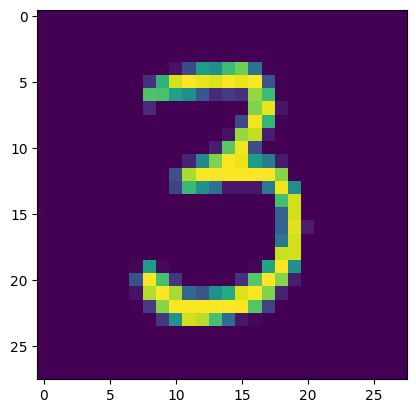

In [7]:
#isplay image
img_plot=plt.imshow(x_train[50])
plt.show()

In [8]:
#prinding the corresponding label
print(y_train[50])

3


image label


In [9]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [10]:
#unique value in y_train
print(np.unique(y_train))

#unique value in y_ttest
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply one hot encoding

all the images have the same dimensions in this datasset if not we have to resize all the images to a common dimension

In [11]:
#scaling the values
x_train=x_train/255
x_test=x_test/255

#here max value is 255 so if i divide by 255 then all value come between 0 and 1

In [12]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural network

In [13]:
#stting up the layers of Neural Nerwork
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),          # if color image (RGB image) hota to (28,28,3)   likhte
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
#compling the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [15]:
#training the NN
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8540 - loss: 0.5170
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9542 - loss: 0.1529
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9665 - loss: 0.1097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9743 - loss: 0.0862
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9792 - loss: 0.0701
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9832 - loss: 0.0576
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9857 - loss: 0.0490
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0419
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9894 - loss: 0.0363
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0335


training data accuracy =98.97%

In [16]:
loss,accuracy=model.evaluate(x_test,y_test)
print("Test loss:",loss)
print("Test accuracy:",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.1441
Test loss: 0.12510254979133606
Test accuracy: 0.9679999947547913


test data accuracy =96.79%


In [17]:
print(x_test.shape)

(10000, 28, 28)


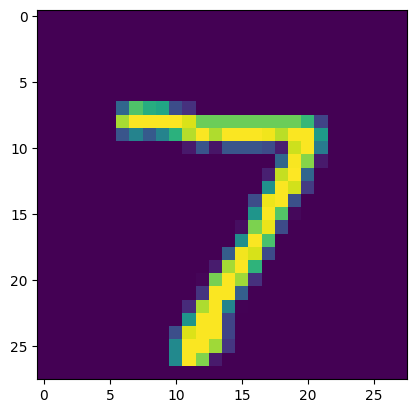

In [18]:
#first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [19]:
print(y_test[0])

7


In [20]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
print(y_pred.shape)

(10000, 10)


In [22]:
print(y_pred[0])


[3.5942101e-03 7.8713072e-07 1.9284468e-02 6.9137537e-01 7.6060608e-08
 1.4329719e-04 9.9394243e-11 9.9997604e-01 1.3352663e-03 1.4258350e-01]


model.predict() gives the prediction probability of each class for that data point

In [23]:
#converting the prediction probabilities to classs label
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [24]:
#converting the prediction probabilities to class labels for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test---> True labels

y_pred_labels--->predicted labels

confusion matrix

In [25]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 948    0    3    1    4    2    6    1    3   12]
 [   0 1112    3    4    4    1    3    2    6    0]
 [   2    0 1004    8    7    0    1    4    6    0]
 [   1    0    5  976    2    6    0    5    8    7]
 [   0    0    2    0  972    0    5    1    1    1]
 [   2    0    2   12    3  853   10    2    7    1]
 [   4    3    2    0    7    6  936    0    0    0]
 [   1    1    8    2    7    0    0  992    4   13]
 [   2    1    5    8   11    3    2    3  936    3]
 [   1    0    0    5   36    7    0    1    8  951]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

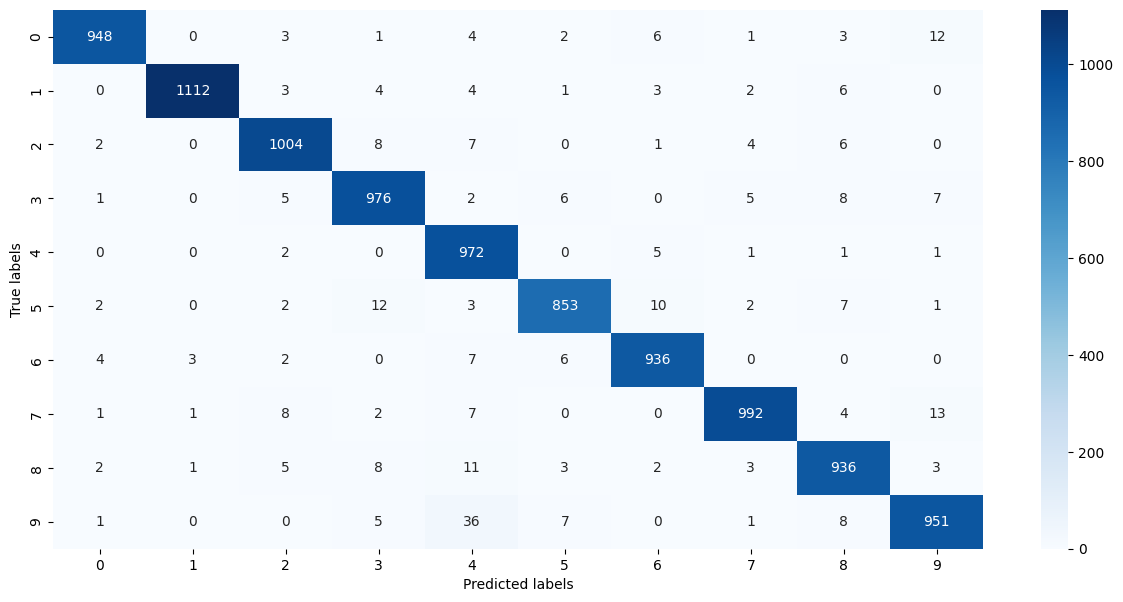

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

buidling a predictive system

In [27]:
input_image_path='/content/drive/MyDrive/AllDataset/44 MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


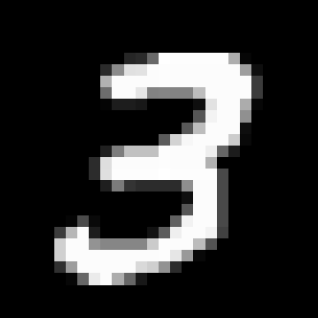

In [30]:
cv2_imshow(input_image)

In [31]:
print(input_image.shape)

(318, 318, 3)


In [32]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(318, 318)

In [34]:
input_image_resize=cv2.resize(grayscale,(28,28))


In [35]:
input_image_resize.shape

(28, 28)

In [36]:
cv2_imshow(input_image_resize)

In [37]:
input_image_resize=input_image_resize/255


In [38]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])  # means i predict for 1 image whose dimensions is 28 and 28 .    if rgb image hota to ham [1,28,28,3] likhte

In [39]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[8.5262941e-10 2.3728644e-06 1.8981638e-06 1.0000000e+00 3.9447956e-17
  1.6444231e-03 1.4338896e-20 1.1309581e-05 1.2666985e-04 1.1847677e-02]]


In [40]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

3


**predictive system**

path of the image to be pricdicted/content/drive/MyDrive/AllDataset/44 MNIST_digit.png


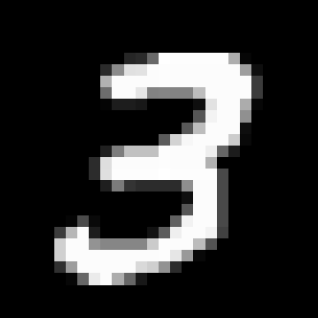

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
THe handwritten digit is recognised as  3


In [64]:
input_image_path=input('path of the image to be pricdicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print('THe handwritten digit is recognised as ',input_pred_label)